In [1]:
import sys
sys.path.append('../src/')

import SimpleITK as sitk
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torchvision.transforms as transforms
from features.tensor_transforms import Create2D, Rescale, AddChannel, NormalizeSample

from data.dataset import DatasetHandler
from torch.utils.data import DataLoader
from data.Empire10 import read_image, read_raw
from utils.visualization import *

/home/moritz/anaconda3/envs/Registration/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# constants
DATASET_PATH = '../data/raw/EMPIRE10/scans/'
DATA_OUT_s = '/home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/scans/'
DATA_OUT_m = '/home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/masks/'

Read image: /home/moritz/Thesis/ImageRegistration/data/interim/EMPIRE10/scans/27_Fixed.nii


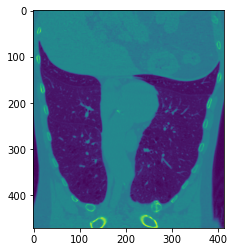

In [3]:
#plt.imshow(sitk.GetArrayViewFromImage(img))
im = DATA_OUT_s + "27_Fixed.nii"
nii = 'NiftiImageIO'
im_out = read_image(im, nii)
showITKImage(im_out)

In [4]:
filename = list(set([x.split('_')[0]
                     for x in os.listdir(DATASET_PATH)]))
print(filename)

['12', '17', '22', '01', '03', '23', '14', '21', '09', '04', '24', '07', '29', '25', '30', '06', '08', '19', '15', '10', '11', '18', '26', '28', '13', '16', '02', '27', '05', '20']


In [5]:
def img_plotter(training_set, cols, rows):
    fig = plt.figure(figsize=(10, 100))
    columns = cols
    rows = rows
    counter = 1
    for i in range(1, rows +1):
        for n in range(2):
            img = training_set[i-1][n].view(shape[0], shape[1], 1)
            fig.add_subplot(rows, columns, counter)
            plt.imshow(img)
            plt.title(training_set[i-1][2])
            counter += 1
    plt.show()

In [6]:
a = torch.randn(2, 3, 3)
a[1,:,:].std()

tensor(1.1906)

x_smallest = 1000000
y_smallest = 1000000

for image_pair in training_set:
    for image in image_pair:
        if not isinstance(image, str):
            current_x, current_y = image.shape[0], image.shape[1]
            if current_x < x_smallest:
                x_smallest = current_x
            if current_y < y_smallest:
                y_smallest = current_y

print(x_smallest, y_smallest)
# 97 270

maxi = 0
mini = 1000000

for image_pair in training_set:
    for image in image_pair:
        if not isinstance(image, str):
            current_max, current_min = image.max(), image.min()
            if current_max > maxi:
                maxi = current_max
            if current_min < mini:
                mini = current_min

print(maxi, mini)
# tensor(0.9686) tensor(0.0196)

In [7]:
shape=(97, 97)
transform = transforms.Compose([
    # Data Preprocessing
    Create2D('y'),
    AddChannel(axs=0),
    Rescale(shape),
    #Data Augmentation
])

In [25]:
partition = {}
partition['train'], partition['validation'] = train_test_split(
    filename, test_size=0.33, random_state=42)

# Generators
training_set = DatasetHandler(partition['train'], root='interim/EMPIRE10/masks/', transform=transform)
print(training_set)

In [26]:
training_set[0][0].shape

torch.Size([1, 97, 97])

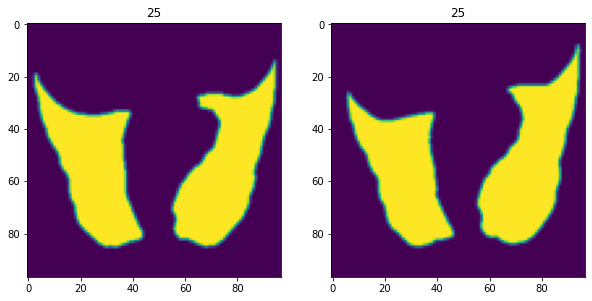

In [27]:
fig = plt.figure(figsize=(10, 100))
columns = 2
rows = 1
sample = 3
for n in range(2):
    img = training_set[sample][n].view(shape[0], shape[1], 1)
    fig.add_subplot(rows, columns, n+1)
    plt.imshow(img)
    plt.title(training_set[sample][2])

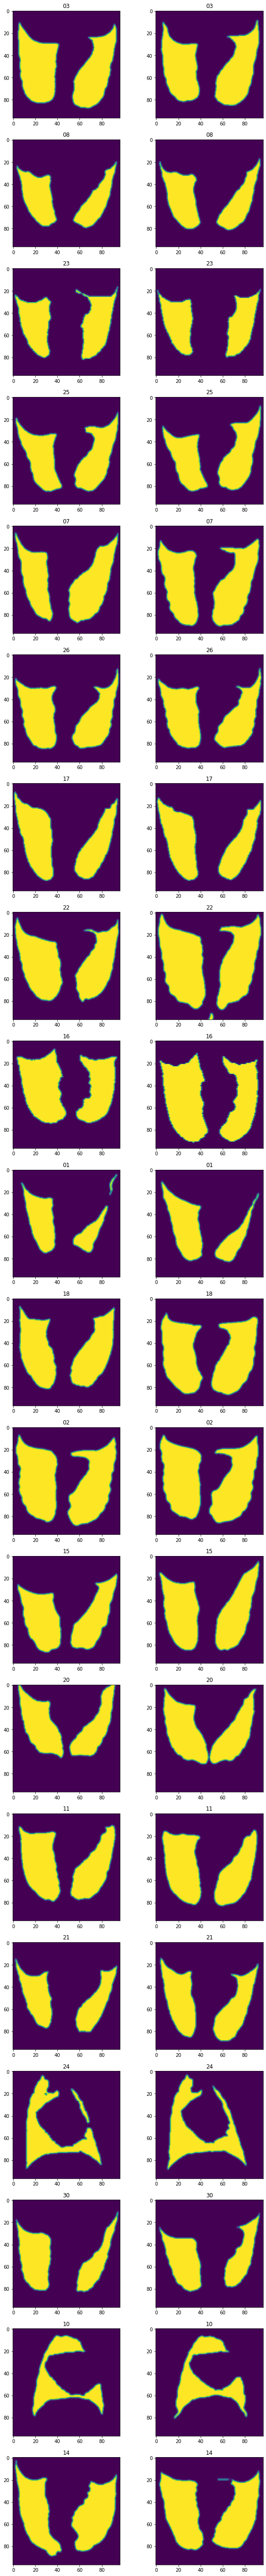

In [28]:
img_plotter(training_set, 2, 20)

In [ ]:
batch_size=4
training_loader = DataLoader(training_set, batch_size=batch_size,
		                                shuffle=True, pin_memory=True)

In [ ]:
# work on transforms to make this work!
for i, batch in enumerate(training_loader):
    if i == 0:
        img_plotter(batch, 2, 4)